# IS445 Individual View

### Requirements
#### This notebook requires a virtual environment that includes packages for Python 3.10 and Jupyter.

### Dataset Info
#### Name of Dataset: HURDAT2 
#### Dataset Link: https://data.world/noaa/hurdat2
#### Size: 3362 KB

### Dataset Characteristics and Licensing Information
#### Licensing: "The information on National Weather Service (NWS) Web pages are in the public domain, unless specifically noted otherwise, and may be used without charge for any lawful purpose so long as you do not: 1) claim it is your own (e.g., by claiming copyright for NWS information -- see below), 2) use it in a manner that implies an endorsement or affiliation with NOAA/NWS, or 3) modify its content and then present it as official government material. You also cannot present information of your own in a way that makes it appear to be official government information." For more information, follow the link https://www.weather.gov/disclaimer
#### Characteristics: "HURDAT2 contains the best track data for cyclones ranging all the way back to 1949 for those that originated in the Northeast and North Central Pacific, and 1851 for those that originated in the Atlantic. The dataset is a compilation of the post-storm analyses prepared by The National Hurricane Center and the Central Pacific Hurricane Center." For this project, I have opted to use data from storms occurring in the Atlantic only. 

In [1]:
import pandas as pd
import bqplot
import bqplot.pyplot as plt
import json
import pandas as pd 
import re
import numpy as np
import random
from functools import reduce
from ast import literal_eval
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns

In [2]:
#Import data, ensure dates render in date format, and check it displays correctly
hurricanes = pd.read_csv("hurricane_data_final.csv",index_col=0, parse_dates=True)
hurricanes['date'] = pd.to_datetime(hurricanes['date'], format='ISO8601')
hurricanes.tail()

,name,year,cyclone_of_the_year,num_of_track_entries,date,time,record_identifier,status_of_system,latitude,longitude,...,34kt_SW,34kt_NW,50kt_NE,50kt_SE,50kt_SW,50kt_NW,64kt_NE,64kt_SE,64kt_SW,64kt_NW
basin,,,,,,,,,,,,,,,,,,,,,
AL,KATE,2015,12,20,2015-11-12,1200,NaN,EX,41.3N,50.4W,...,180.0,120.0,120.0,120.0,60.0,0.0,0.0,0.0,0.0,0.0
AL,KATE,2015,12,20,2015-11-12,1800,NaN,EX,41.9N,49.9W,...,180.0,120.0,120.0,120.0,60.0,0.0,0.0,0.0,0.0,0.0
AL,KATE,2015,12,20,2015-11-13,0,NaN,EX,41.5N,49.2W,...,200.0,220.0,120.0,120.0,60.0,0.0,0.0,0.0,0.0,0.0
AL,KATE,2015,12,20,2015-11-13,600,NaN,EX,40.8N,47.5W,...,180.0,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,KATE,2015,12,20,2015-11-13,1200,NaN,EX,40.7N,45.4W,...,150.0,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#I want to see how large this dataset is
hurricanes.shape

(49105, 24)

In [4]:
#I only want to look at named storms, so I will filter out any unnaamed storms 
substring = 'UNNAMED'
filter = hurricanes['name'].str.contains(substring)
filtered_hurricanes = hurricanes[~filter]

#Let's check the dataset to see if it shrank and reprint the new set with 'UNNAMED' storms removed
filtered_hurricanes.shape
filtered_hurricanes

,name,year,cyclone_of_the_year,num_of_track_entries,date,time,record_identifier,status_of_system,latitude,longitude,...,34kt_SW,34kt_NW,50kt_NE,50kt_SE,50kt_SW,50kt_NW,64kt_NE,64kt_SE,64kt_SW,64kt_NW
basin,,,,,,,,,,,,,,,,,,,,,
AL,ABLE,1950,1,51,1950-08-12,0,NaN,TS,17.1N,55.5W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,ABLE,1950,1,51,1950-08-12,600,NaN,TS,17.7N,56.3W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,ABLE,1950,1,51,1950-08-12,1200,NaN,TS,18.2N,57.4W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,ABLE,1950,1,51,1950-08-12,1800,NaN,TS,19.0N,58.6W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,ABLE,1950,1,51,1950-08-13,0,NaN,TS,20.0N,60.0W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL,KATE,2015,12,20,2015-11-12,1200,NaN,EX,41.3N,50.4W,...,180.0,120.0,120.0,120.0,60.0,0.0,0.0,0.0,0.0,0.0
AL,KATE,2015,12,20,2015-11-12,1800,NaN,EX,41.9N,49.9W,...,180.0,120.0,120.0,120.0,60.0,0.0,0.0,0.0,0.0,0.0
AL,KATE,2015,12,20,2015-11-13,0,NaN,EX,41.5N,49.2W,...,200.0,220.0,120.0,120.0,60.0,0.0,0.0,0.0,0.0,0.0


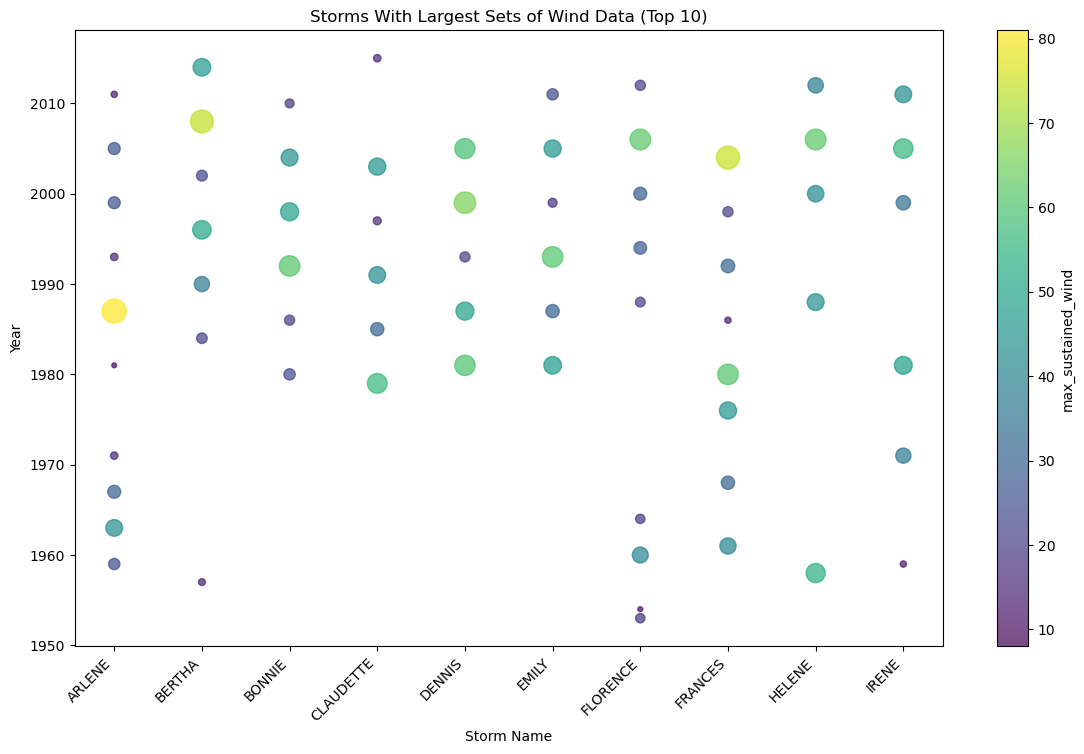

In [5]:
#Filter data to see which storms have the most entries based on max_sustained_wind log entries
grouped_storms = filtered_hurricanes.groupby(['name', 'year']).size().reset_index(name='max_sustained_wind')
top_storms = grouped_storms.groupby('name')['max_sustained_wind'].sum().nlargest(10).index

#Filter the data for storms with the most data
filtered_storms = grouped_storms[grouped_storms['name'].isin(top_storms)]

size_scaler = Normalize(vmin=filtered_storms['max_sustained_wind'].min(), 
                        vmax=filtered_storms['max_sustained_wind'].max())

#Create the scatter plot to display top 10 storms which have the most wind data
fig, ax = plt.subplots(figsize=(14, 8))
scatter = ax.scatter(filtered_storms['name'], filtered_storms['year'], s=size_scaler(filtered_storms['max_sustained_wind'])*300, c=filtered_storms['max_sustained_wind'], cmap='viridis', alpha=0.7)

cbar = plt.colorbar(scatter)
cbar.set_label('max_sustained_wind')
ax.set_xlabel('Storm Name')
ax.set_ylabel('Year')
ax.set_title('Storms With Largest Sets of Wind Data (Top 10)')

plt.xticks(rotation=45, ha='right')

plt.show()
fig.savefig('top10storms.png', bbox_inches='tight')

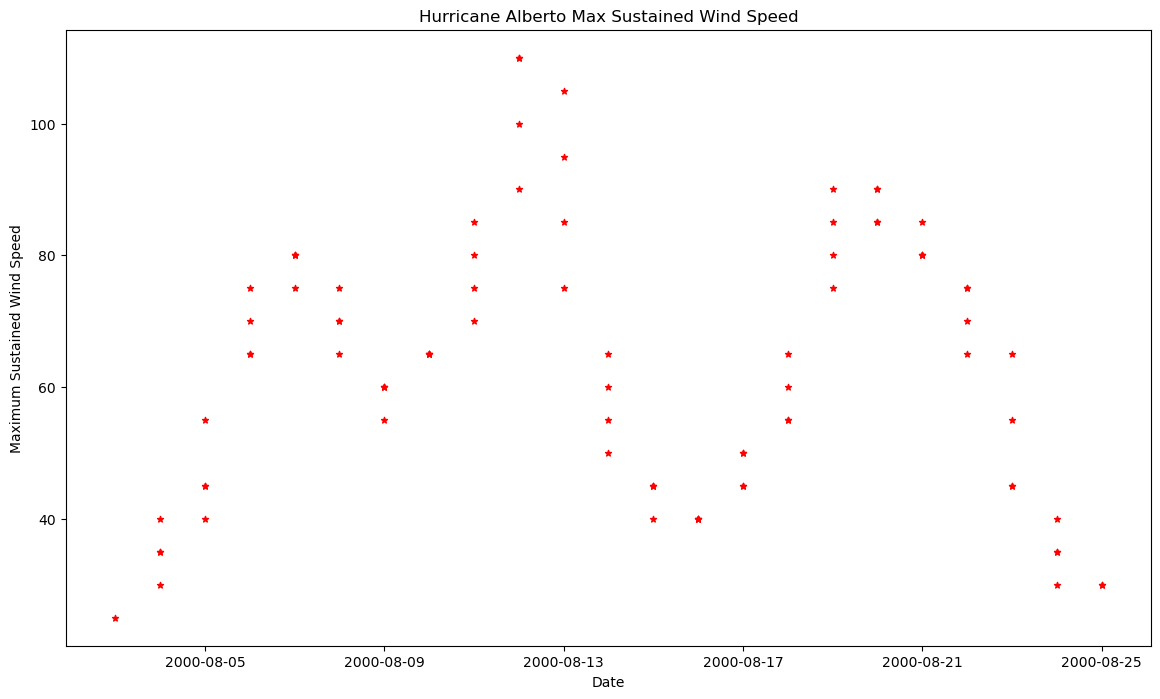

In [6]:
#Wind data is most prevalent in storms occurring after 1950. The storm Alberto which took place 
#in 2000 has a large set of wind data. Let's take a look and see how wind speeds changed over the
#duration of that storm.
plt.figure(figsize=(14, 8))

#filter the named hurricanes to only look at the storm Alberto in 2000
alberto = filtered_hurricanes.loc[(filtered_hurricanes['name'] == 'ALBERTO') & (filtered_hurricanes['year'] == 2000)]

#create the scatter plot
scatter = plt.scatter(x=alberto['date'], y=alberto['max_sustained_wind'], marker='*', s=20, c='red')

plt.xlabel('Date')
plt.ylabel('Maximum Sustained Wind Speed')
plt.title('Hurricane Alberto Max Sustained Wind Speed')

plt.show()
fig.savefig('alberto2000windspd.png', bbox_inches='tight')